Link to Dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who
    
For my final project, I examined a dataset on average Life Expectancy per country during the years between 2000 to 2015. The dataset also included additional values such as GDP and Polio Immunization for each country. 

The code below investigates how each of these factors affect life expectancy as well as the different properties of developed and developing countries.

In [1]:
#Importing Libraries
#Link to Dataset:
import math
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='ConnieH', api_key = 'jBFILyDb42gFGCPoMsAm')
import plotly.graph_objs as go

import numpy as np
from scipy.stats.stats import pearsonr 
from scipy.stats import linregress
#linregress(xsss, ysss)
import pandas as pd

import random 

from collections import OrderedDict
from datetime import date

import matplotlib.pylab as plt
%matplotlib inline 

# We're now going to import some important libraries
import statistics
import numpy.random # for generating a noisy data set
from sklearn import linear_model # for training a linear model

# MatPlotlib
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

from scipy.stats.stats import pearsonr 
dataset = pd.read_csv('/Users/conhong/Desktop/school/Computer Science/Programming and Data Analytics/Final/Life Expectancy Data.csv', sep = ",")
datase=pd.read_csv('/Users/conhong/Desktop/school/Computer Science/Programming and Data Analytics/Final/Life Expectancy Data.csv', sep = ",")

Cleaning the data set for Null values: (Also creating a new dataframe with only integer values)

In [322]:
datase.drop('Country', axis=1, inplace=True)#Drop Name of Country
mes = datase.dropna(how='any',axis=0) #cleaned version of dataset above
datase.drop('Status', axis=1, inplace=True)#Drop Status of country
cleaneddatse = datase.dropna(how='any',axis=0) #clean it for missing values

Observing the Distribution of all Life Expectancy predictions:

Text(0.5,0,'Life Expectancy')

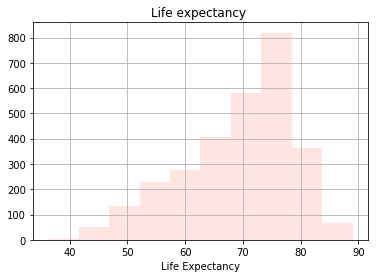

In [323]:
dataset.hist(column = "Life expectancy ", bins = 10,color = 'mistyrose')
plt.xlabel("Life Expectancy")#, #title = "Life Expectancy ")

Observing the change in Life Expectancy over the Years:

In [324]:
allcountries = []
for index, row in dataset.iterrows():
    if row['Country'] not in allcountries:
        allcountries.append(row['Country'])

allyearz = [[]]
for index, row in dataset.iterrows():
    if row['Year'] not in allyearz:
        allyearz.append(row['Year'])

In [325]:
alllifesort = {}
for i in allcountries:
    mehap = {}
    for index, row in dataset.iterrows():
        if row["Country"] == i:
            mehap.update({row["Year"]:row["Life expectancy "]})
    alllifesort.update({i:mehap})

Between Developed and Developing Countries:

In [326]:
developed = dataset[dataset['Status'] == 'Developed']
developing = dataset[dataset['Status'] == 'Developing']

In [327]:
yearscollected = []
for index, row in dataset.iterrows():
    if row['Year'] not in yearscollected:
        yearscollected.append(row['Year'])    

In [328]:
yearlifeexpect = {}
for i in yearscollected:
    year = dataset[dataset['Year'] == i]
    thatyear = []
    for index, row in year.iterrows():
        thatyear.append(row['Life expectancy '])
    averageyear = sum(thatyear)/len(thatyear)
    if math.isnan(averageyear) == False:
        yearlifeexpect.update({i:averageyear})

In [329]:
yearlifeexpectdevelop = {}
for i in yearscollected:
    year = developed[developed['Year'] == i]
    thatyear = []
    for index, row in year.iterrows():
        thatyear.append(row['Life expectancy '])
    averageyear = sum(thatyear)/len(thatyear)
    if math.isnan(averageyear) == False:
        yearlifeexpectdevelop.update({i:averageyear})

In [330]:
yearlifeexpectdeveloping = {}
for i in yearscollected:
    year = developing[developing['Year'] == i]
    thatyear = []
    for index, row in year.iterrows():
        thatyear.append(row['Life expectancy '])
    averageyear = sum(thatyear)/len(thatyear)
    if math.isnan(averageyear) == False:
        yearlifeexpectdeveloping.update({i:averageyear})

In [331]:
allexpect = {}
allexpect.update({"Develping":yearlifeexpectdeveloping})
allexpect.update({"Develped":yearlifeexpectdevelop})
allexpect.update({"Average":yearlifeexpect})

69.69006622516555
Develping
80.709375
Develped
71.61693989071036
Average


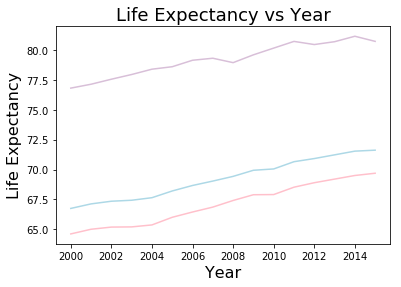

In [332]:
colors = ['pink', 'thistle', 'lightblue']
colornum = 0
for i in allexpect:
    mehs = allexpect[i]
    print(mehs[2015])
    print(i)
    ys = []
    xs = []
    for e in mehs:
        xs.append(e)
        ys.append(mehs[e])
    plt.plot(xs, ys,  color = colors[colornum])
    plt.title('Life Expectancy vs Year', fontsize = 18)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Life Expectancy', fontsize=16)
    colornum +=1

Legend:

Purple = Developed,
Blue = Average,
Pink = Developing

So far, developing countries have the lowest life expectancy compared to the global average and developed countries.

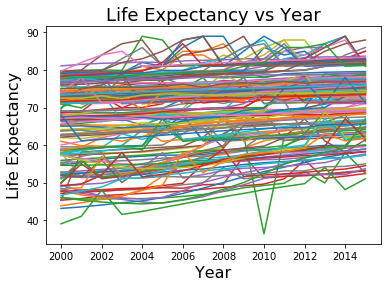

In [333]:
for i in alllifesort:
    #print(alllifesort[i])
    xs = []
    ys = []
    for e in alllifesort[i]:
        wow = alllifesort[i]
        xs.append(e)
        ys.append(wow[e])
    #plt.plot(xs, ys)
    plt.plot(xs, ys)
    plt.title('Life Expectancy vs Year', fontsize = 18)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Life Expectancy', fontsize=16)
    #plt.show()

In [334]:
print(str(allexpect['Average'][2015]-allexpect['Average'][2003]))
print(str(allexpect['Average'][2015]))

4.183606557377004
71.61693989071036


On average, the global life expectancy has increased about 4 years between the years of 2000 to 2015, as represented by the average change in life expectnacy since 2000. Overall, there is a small upward trend relating Life Expectancy and the Year, hinting at improved living conditions world-wide.

Cleaning Dataset once more for Scaling:

In [335]:
datase.drop('percentage expenditure', axis=1, inplace=True)
#datase.drop('', axis=1, inplace=True)
datase.drop('Life expectancy ', axis=1, inplace = True)
datase2 = datase.dropna(how='any',axis=0)

Scaling Data:

In [336]:
model = linear_model.LinearRegression()

In [337]:
from sklearn import preprocessing
# Get column names first
names = cleaneddatse.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(cleaneddatse)
mcaled_df = pd.DataFrame(scaled_df, columns=names)
#Training on only 80% of the data
model.fit(mcaled_df, mcaled_df['Life expectancy '])
#Scaled the data such that all lies between a certain range

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Creating a Linear Regression Model:

In [338]:
lifezpan = list(cleaneddatse['Life expectancy '])#lifespan of cleaned dataset
lifezpanfifes = list(cleaneddatse['Life expectancy '][(cleaneddatse['Year'] == 2015)])

Find which factors 

1) correlate to Life Expectancy the most by checking which their correlation values(r^2).

2) affect the Life Expectancy the most by checking the slopes of the model of each independent value in relation to the Life Expectancy.

In [339]:
listb = list(model.coef_)
listfinal2= []
for i in listb:
    listfinal2.append(abs(i))
listfinal = []
for i in listb:
    listfinal.append(abs(i))
listfinal.sort()

In [340]:
columnsofleaned = (list(mcaled_df.columns))

In [341]:
from sklearn.metrics import r2_score
allregressionscores = {}
for i in columnsofleaned:
    allregressionscores.update({i:r2_score(mcaled_df[i], mcaled_df['Life expectancy '])})
wellseeionscores = list(allregressionscores.values())
wellseeionscores.sort()
#print(wellseeionscores[-6:-1])
bestfromlowtobest = []
for i in allregressionscores:
    if allregressionscores[i] in wellseeionscores[-6:-1]:
        bestfromlowtobest.append(i)
print(bestfromlowtobest)

['percentage expenditure', ' BMI ', 'GDP', 'Income composition of resources', 'Schooling']


The top five factors that have the highest correlation with Life Expectancy are shown above.

In [342]:
top3causes = listfinal[-6:-1]
top3causesprint = []
for i in top3causes:
    if columnsofleaned[listfinal2.index(i)]!="Year":
        top3causesprint.append(columnsofleaned[listfinal2.index(i)])
print(top3causesprint)

[' HIV/AIDS', 'Polio', 'Population', 'under-five deaths ', 'infant deaths']


The top five factors that affect the Life Expectancy the most are shown above.

Graphs to Visualize the Factors

Values that have the highest correlation with Life Expectancy:

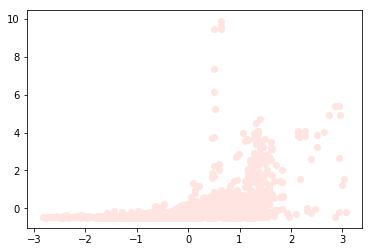

In [343]:
plt.scatter(x=mcaled_df['Schooling'], y = mcaled_df['GDP'], color = 'mistyrose')

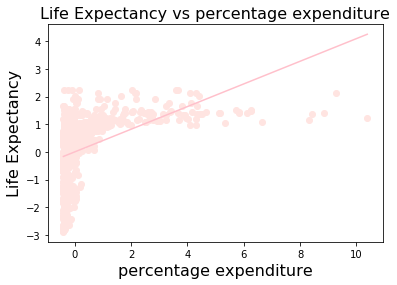

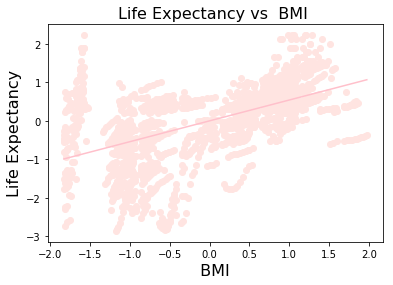

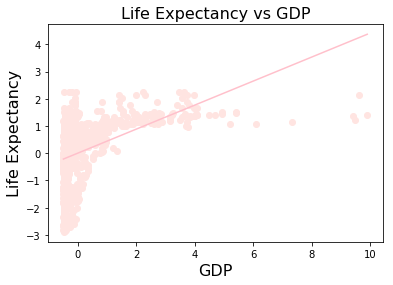

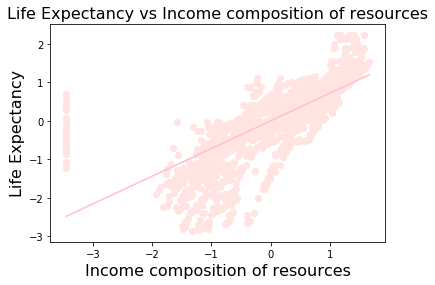

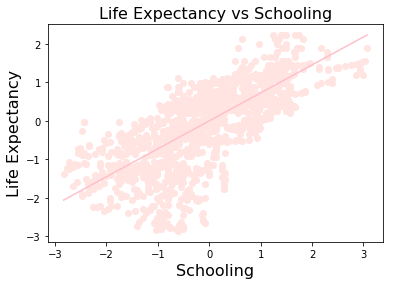

In [344]:
for i in bestfromlowtobest:
    plt.scatter(x=mcaled_df[i], y=mcaled_df['Life expectancy '], color='mistyrose')
    plt.title("Life Expectancy vs " +str(i), fontsize=16)
    plt.xlabel(i, fontsize=16)
    plt.ylabel("Life Expectancy", fontsize=16)
    mewow = list(mcaled_df[i])
    mewoah = list(mcaled_df['Life expectancy '])
    plt.plot(np.unique(mewow), np.poly1d(np.polyfit(mewow, mewoah,1))(np.unique(mewow)), color = 'pink')
    plt.show()

Values that affect the Life Expectancy the Most:

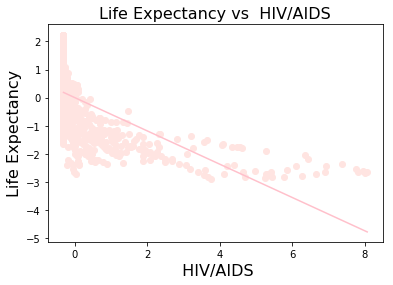

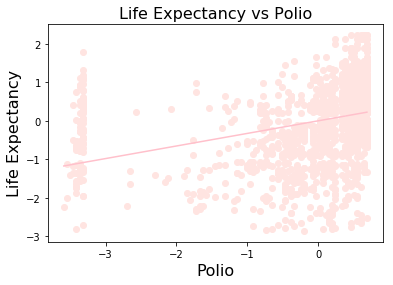

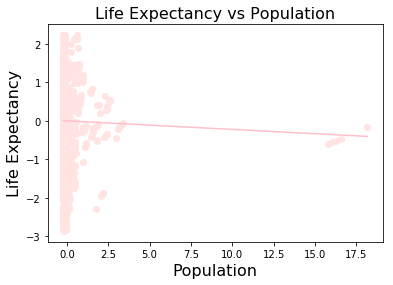

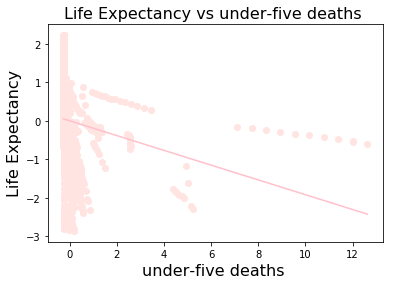

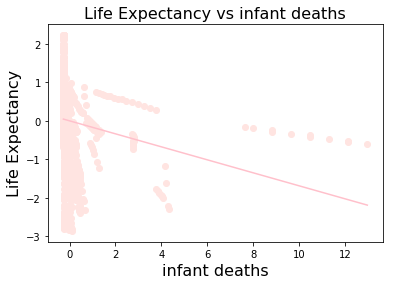

In [345]:
for i in top3causesprint:
    plt.scatter(x=mcaled_df[i], y=mcaled_df['Life expectancy '], color = 'mistyrose')
    plt.title("Life Expectancy vs " +str(i), fontsize=16)
    plt.xlabel(i, fontsize=16)
    plt.ylabel("Life Expectancy", fontsize=16)
    mewow = list(mcaled_df[i])
    mewoah = list(mcaled_df['Life expectancy '])
    plt.plot(np.unique(mewow), np.poly1d(np.polyfit(mewow, mewoah,1))(np.unique(mewow)), color = 'pink')
    plt.show()

Testing Accuracy of Linear Model:

In [346]:
#Setting segment dataset in which we test on
testingdat = mcaled_df[-(int(len(mcaled_df))-(int(len(mcaled_df)*0.8))):]
#testingdatlifeexpect = 

Comparing Developed and Developing Countries (Logistic Regression)

In [347]:
allstatusofcleaned = []
for index, row in mes.iterrows():
    if row['Status'] == "Developing":
        allstatusofcleaned.append(0)
    if row['Status'] == "Developed":
        allstatusofcleaned.append(1)
trainingstatus = allstatusofcleaned[0:(int(0.8*len(allstatusofcleaned)))]
trainingrows = mcaled_df.head(len(trainingstatus))

In [348]:
wodel = linear_model.LogisticRegression()
wodel.fit(trainingrows, trainingstatus)
print('Intercept: {0}  Parameters: {1}'.format(model.intercept_, model.coef_))
alllogisregressionscores = {}

Intercept: -1.9721522630525295e-30  Parameters: [-1.73472348e-16  1.00000000e+00  2.49800181e-16  1.11022302e-15
  2.77555756e-17  1.52655666e-16  5.55111512e-17 -1.31838984e-16
  2.77555756e-16 -4.71844785e-16  3.74700271e-16 -3.05311332e-16
 -3.05311332e-16 -3.46944695e-16 -1.04083409e-16 -4.16333634e-16
  4.51028104e-17 -2.08166817e-17 -2.42861287e-16 -1.94289029e-16]


In [349]:
testingstatus = allstatusofcleaned[-(len(allstatusofcleaned)-(int(0.8*len(allstatusofcleaned)))):]
testingdata = mcaled_df.tail(len(testingstatus))

In [350]:
guesses = []
for index, row in testingdata.iterrows():
    inputs = list(row)
    guesses.append(int(wodel.predict([inputs])))

In [351]:
right = 0
totall = 0
for i in testingstatus:
    totall +=1
    if i == guesses[testingstatus.index(i)]:
        right +=1
print("The model is accurate %" + str(right/totall)+" of the time.")

The model is accurate %0.9424242424242424 of the time.


In [352]:
mostaccurate = []
accuracies = []
lodel = linear_model.LogisticRegression()
for i in columnsofleaned:
    train = (pd.DataFrame(trainingrows[i]))
    lodel.fit(train, trainingstatus)
    test = (pd.DataFrame(testingdata[i]))
    guesse = []
    gussright = 0
    alls = 0
    for index, row in test.iterrows():
        alls+=1
        guesse.append(int(lodel.predict([list(row)])))
    for e in testingstatus:
        if e == guesse[testingstatus.index(e)]:
            gussright +=1
    accuracies.append(int(gussright/alls))
    if int(gussright/alls) == 1 and i !="Year":
        mostaccurate.append(i)
    if i =="Alcohol":
        print("Status vs Alcohol Model is " +str(gussright/alls) +"% of the time.")

Status vs Alcohol Model is 0.9424242424242424% of the time.


In [353]:
print("The most accurate logistic regression models, to determine a Developed or Developing country are " + str(mostaccurate) +".")

The most accurate logistic regression models, to determine a Developed or Developing country are ['Life expectancy ', 'Income composition of resources', 'Schooling'].


In [354]:
print(list(names))
allaverage = {}
for i in (list(names)):
    averagesdevelop = []
    averagesdeveloping = []
    if i != 'Year':
        for index, row in dataset.iterrows():
            if row['Status'] == 'Developed':
                if math.isnan(row[i])!=True:
                    averagesdevelop.append(row[i])
            if row['Status'] == 'Developing':
                if math.isnan(row[i])!=True:
                    averagesdeveloping.append(row[i])
        develop = sum(averagesdevelop)/len(averagesdevelop)
        notdevelop = sum(averagesdeveloping)/len(averagesdeveloping)
        allaverage.update({i:[develop, notdevelop]})

['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [355]:
zero = []
one = []
sadthings = [] #Factors such as #number of cases of x illness amongst popultaion
goodthings = [] #Factors such as Immunization%.
for i in allaverage:
    meh = allaverage[i]
    #print(meh[0])
    zero.append(float(meh[0]))
    one.append(float(meh[1]))
    if meh[0] < meh[1]:
        sadthings.append(i)
    else:
        goodthings.append(i)
pd.DataFrame(allaverage)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,79.197852,79.685547,1.494141,9.826736,2703.600380,88.041298,499.005859,51.803906,1.810547,93.736328,7.554042,93.476562,0.100000,22053.386446,6.830053e+06,1.320703,1.296680,0.852489,15.845474
1,67.111465,182.833195,36.384171,3.484119,323.470285,79.763930,2824.926216,35.435326,50.525144,80.170752,5.590694,79.951807,2.088664,4286.556053,1.407108e+07,5.592935,5.635242,0.582310,11.219256


In [356]:
dataet = {
    'Developed':zero,
     "Developing":one
}
dfest = pd.DataFrame(dataset)   
#dfest

In all of the factors, Developed countries, on average, performed better than Developing countries. For example, GDP growth was consistently greater in those of Developed countries, whereas the number of measles cases were higher in Developing Countries. 

Text(0,0.5,'Status (Developed = 1) (Developing = 0)')

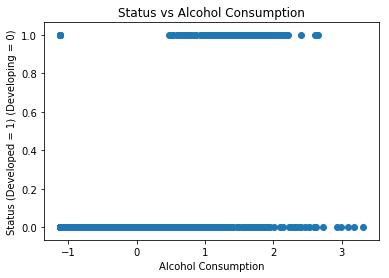

In [357]:
plt.scatter(x = mcaled_df['Alcohol'], y=allstatusofcleaned)
plt.title('Status vs Alcohol Consumption')
plt.xlabel("Alcohol Consumption")
plt.ylabel("Status (Developed = 1) (Developing = 0)") 

One "negative" factor that Developed countries had a higher value in than Developing was alcohol consumption. This could be correlated to GDP rather than a lack of education or development. However, alcohol consumption is not the most accurate factor to identify the status of a country as the logistic regression model for this model was only accurate about 94% of the time.

Closer Look into Schooling:

In the dataset, the factor "Schooling" represents the average number of years of schooling in each country. Schooling tested to have one of the highest correlations with Life Expectancy.  Additionally, in the logistic regression model of the Developed and Developing country, the model based off Schooling as an indepedent factor was also one of the most accurate models when tested.

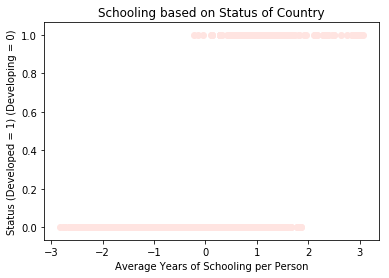

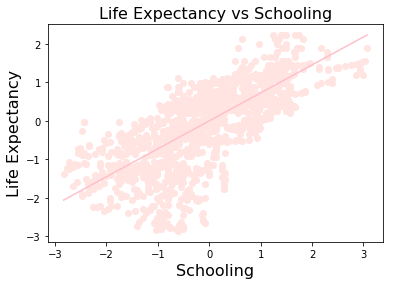

In [358]:
plt.scatter(x=mcaled_df['Schooling'], y=allstatusofcleaned, color = "mistyrose")
plt.title("Schooling based on Status of Country")
plt.xlabel("Average Years of Schooling per Person")
plt.ylabel("Status (Developed = 1) (Developing = 0)") 
plt.show()
plt.scatter(x=mcaled_df['Schooling'], y=mcaled_df['Life expectancy '], color = 'mistyrose')
plt.title("Life Expectancy vs Schooling", fontsize=16)
plt.xlabel(i, fontsize=16)
plt.ylabel("Life Expectancy", fontsize=16)
mewow = list(mcaled_df['Schooling'])
mewoah = list(mcaled_df['Life expectancy '])
plt.plot(np.unique(mewow), np.poly1d(np.polyfit(mewow, mewoah,1))(np.unique(mewow)), color = 'pink')
plt.show()
#plt.legend(loc = 'Status')


As seen above, there is some correlation with the Status of the country or Life expectancy to the average years of education per individual in each country. In order to further test how accurate this model is, I trained another linear regression model on Life Expectancy vs Schooling to test the confidence intervals.

Testing a Linear Model on Life Expectancy vs Schooling:

In [359]:
%matplotlib inline

from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [360]:
#Here, I train a linear regression model on 80% of the data.
ytrain = mcaled_df['Life expectancy '][0:int(len(mcaled_df)*0.8)]
Xtrain = mcaled_df['Schooling'][0:int(len(mcaled_df)*0.8)]
Xstrain = sm.add_constant(Xtrain)
model11 = sm.OLS(ytrain, Xstrain).fit()


In [361]:
#Setting up dataset(remaining 20% of data) that I will test linear regression model on.
ytest = mcaled_df['Life expectancy '][-int(len(mcaled_df)*0.2):]
Xtest = mcaled_df['Schooling'][-int(len(mcaled_df)*0.2):]
Xstest = sm.add_constant(Xtest)

mrstd, lbound, ubound = wls_prediction_std(sm.OLS(ytest, Xstest).fit())

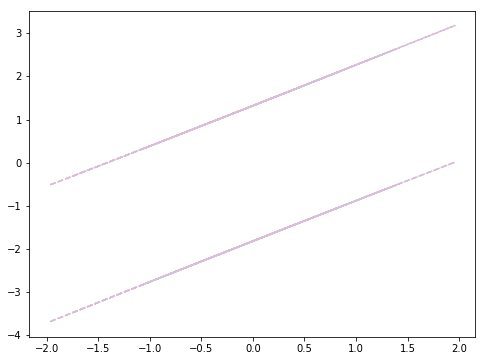

In [362]:
#Axis of tested Dataset
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Xtest, ubound, 'r--', color = 'thistle')
ax.plot(Xtest, lbound, 'r--', color ='thistle')

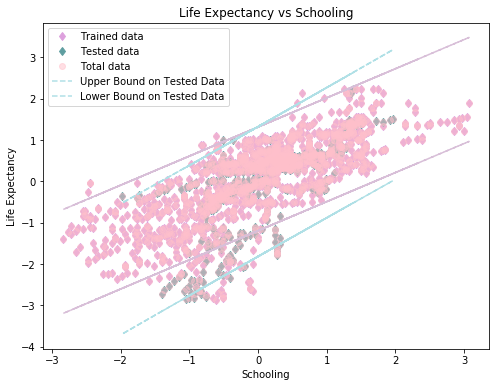

In [363]:
#Compare the tested and trained dataset.
prstd, lowerbound, upperbound = wls_prediction_std(model11)
#print(iv_u)
#print(iv_l)

fig, ax = plt.subplots(figsize=(8,6))

#plot the data model was trained on:
ax.plot(Xtrain, ytrain, 'd', label="Trained data", color = 'plum')
ax.plot(Xtest, ytest, 'd', label="Tested data", color = 'cadetblue')
#plot the whole dataset:
ax.plot(mcaled_df['Schooling'], mcaled_df['Life expectancy '],'o',label="Total data", color = 'pink', alpha=0.5)

# boundaries
ax.plot(Xtrain, upperbound, 'r--', color = 'thistle')
ax.plot(Xtrain, lowerbound, 'r--', color ='thistle')
ax.plot(Xtest, ubound, 'r--', color = 'powderblue', label = "Upper Bound on Tested Data")
ax.plot(Xtest, lbound, 'r--', color ='powderblue', label = "Lower Bound on Tested Data")
plt.title('Life Expectancy vs Schooling')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
#legend
ax.legend(loc='best');

In [364]:
#Checking for how much the bounds of the trained dataset match does with the tested datatset.
yees = 0
totaly =0
eff = list(ubound)
efff = list(upperbound)
yff = list(lbound)
yfff = list(lowerbound)
for i in list(ubound):
    totaly+=1
    if efff[eff.index(i)] > i-0.5 and efff[eff.index(i)] < i+0.5:
        if yfff[yff.index(yff[eff.index(i)])] > yff[eff.index(i)]-0.5 and  yfff[yff.index(yff[eff.index(i)])] < yff[eff.index(i)]+0.5:
            yees+=1

In [365]:
print(yees/totaly)

0.1458966565349544


The bounds don't really match, because they don't overlap often. Thus, 80% of the data isn't very representive of the whole dataset, because the bounds of the two different segments of data(tested and trained) don't match well and are not similar to each other.